In [1]:
import os
import pandas as pd

from util.util import _fix_seed

from models.building import Building

from util.arx import get_arx_model
from util.plot import plot_building_errors, compare_pcnode_arx_trajectories, plot_building_trajectories

In [2]:
# To get nice plots
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['text.usetex'] = True

# For reproducibility
_fix_seed(seed=0)

In [3]:
df = pd.read_csv(os.path.join('data', 'building.csv'), index_col=0)
df.index = pd.to_datetime(df.index)
df.head()

,Q_sun,T_out,T_272,T_273,T_274,Q_heat_272,Q_heat_273,Q_heat_274,Case,Q_cool_272,Q_cool_273,Q_cool_274
2019-05-01 00:00:00,0.0,281.027023,295.3547,297.5594,296.9295,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2019-05-01 00:15:00,0.0,280.781382,295.3547,297.5594,296.9295,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2019-05-01 00:30:00,0.0,280.677863,295.3547,297.5594,296.9295,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2019-05-01 00:45:00,0.0,280.493938,295.3547,297.5594,296.9295,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2019-05-01 01:00:00,0.0,280.343133,295.3547,297.5594,296.9295,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [4]:
# Set to False to train from scratch
try_to_load = True
# Set custom names to train new pinodes - below are the pretrained ones
name = 'default'

pinode = Building(data=df, h=1, lr=0.01, try_to_load=try_to_load, name=name)

if not try_to_load:
    pinode.fit(100)


Trying to load a trained model...
Found!
The model has been fitted for 68 epochs already, with loss  0.01443.



Mean MAE
ARX:			1.93
PiNODE:			1.18

Improvements
Average:		38.9%
End of the horizon:	55.8%



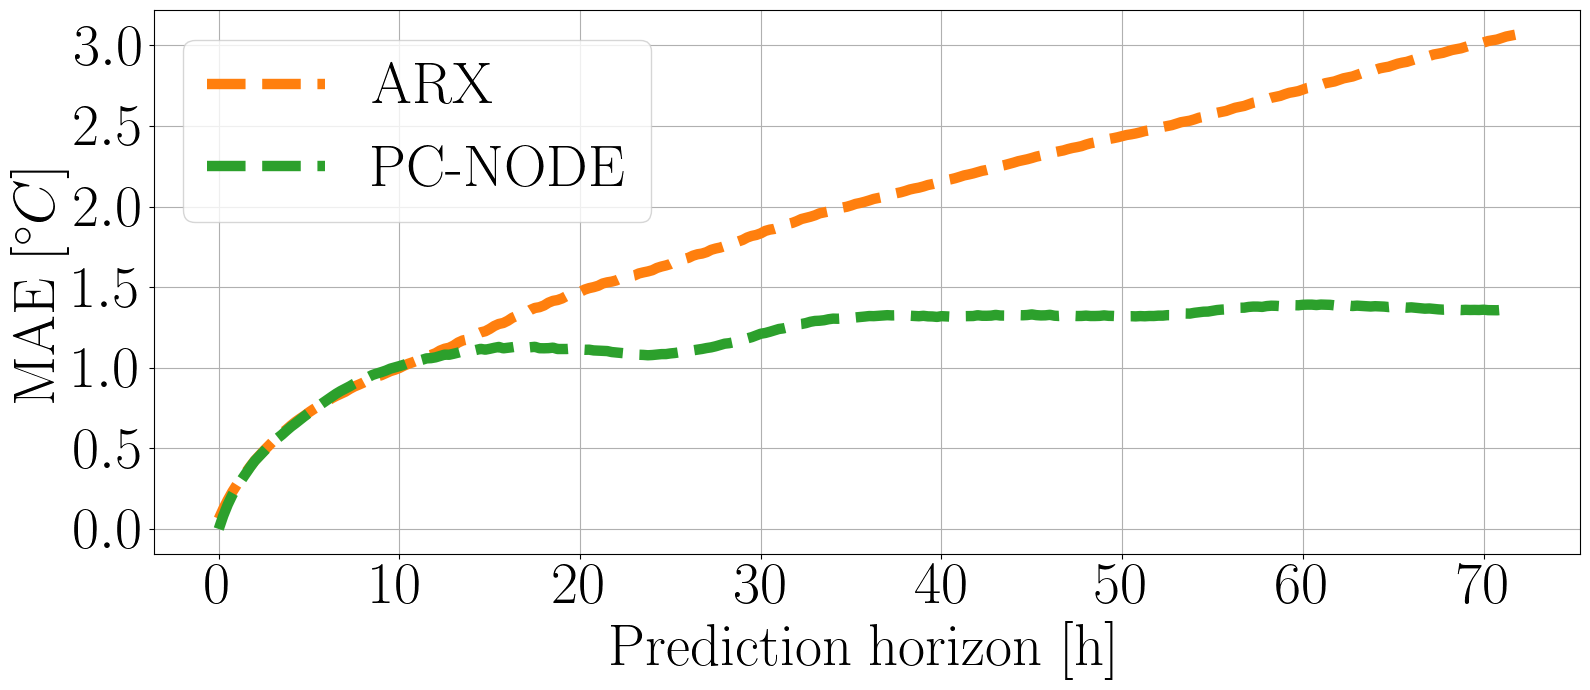

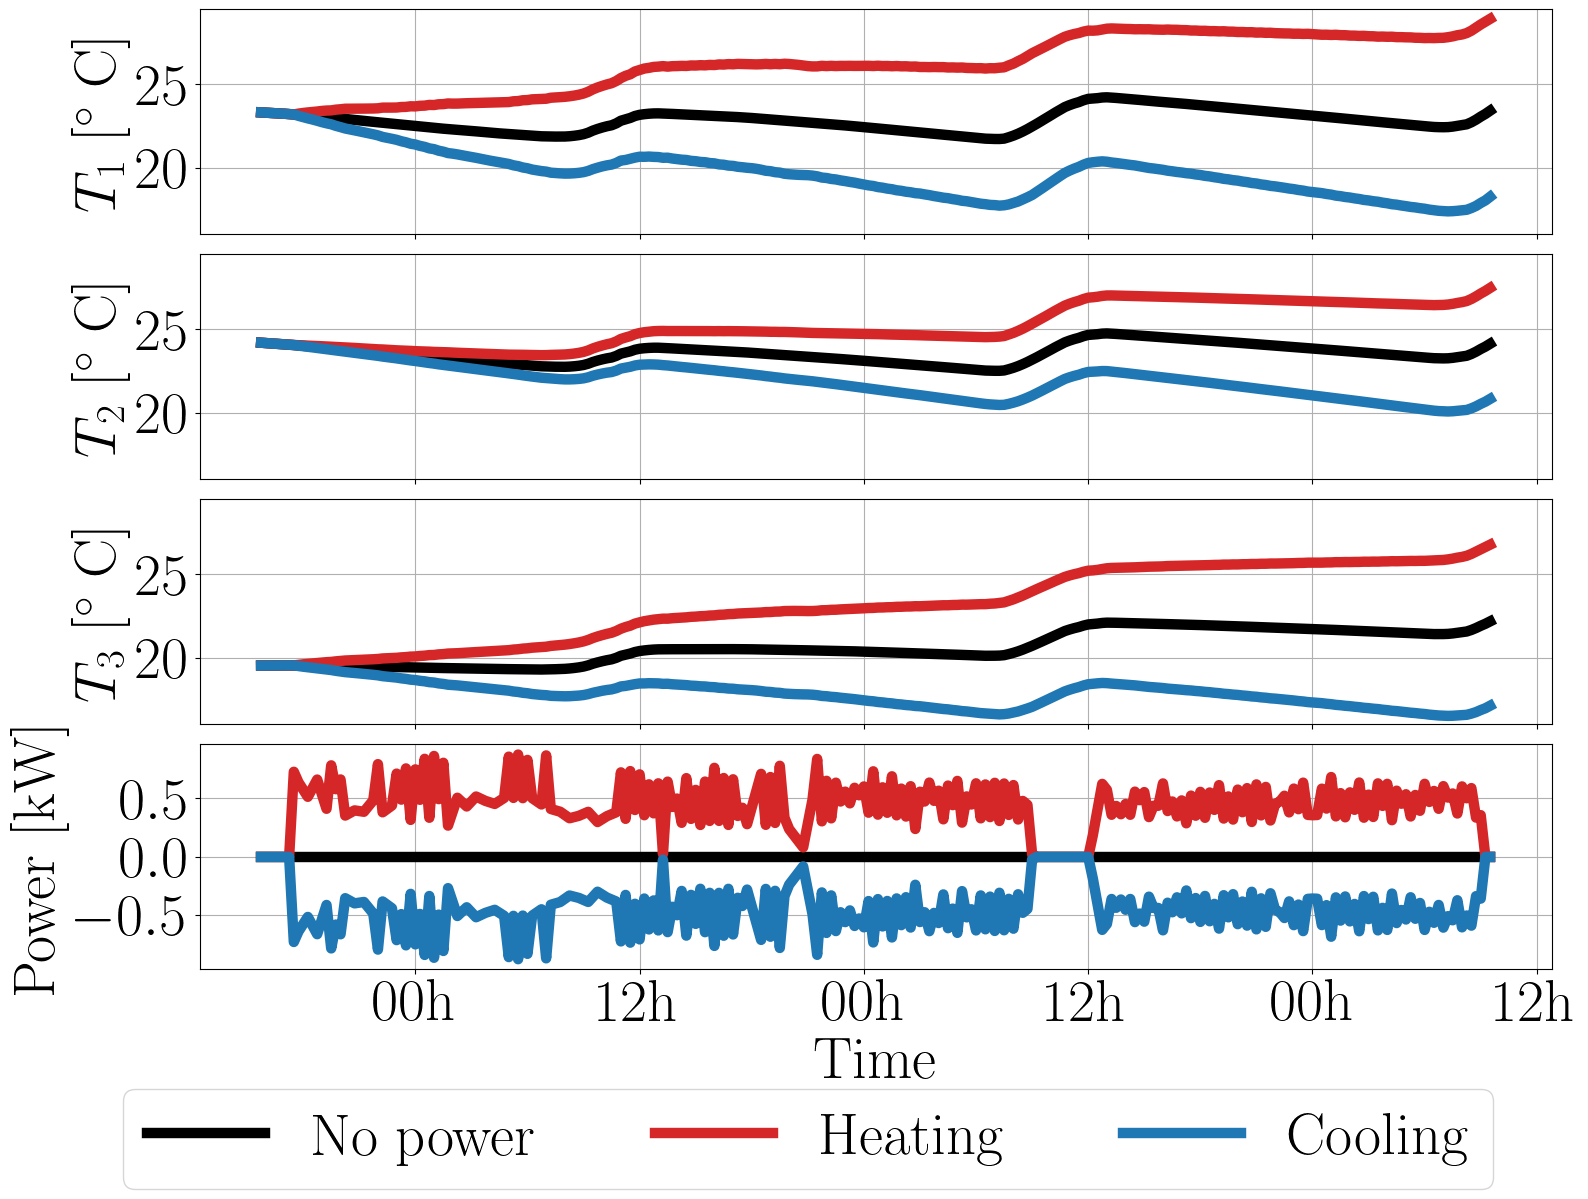

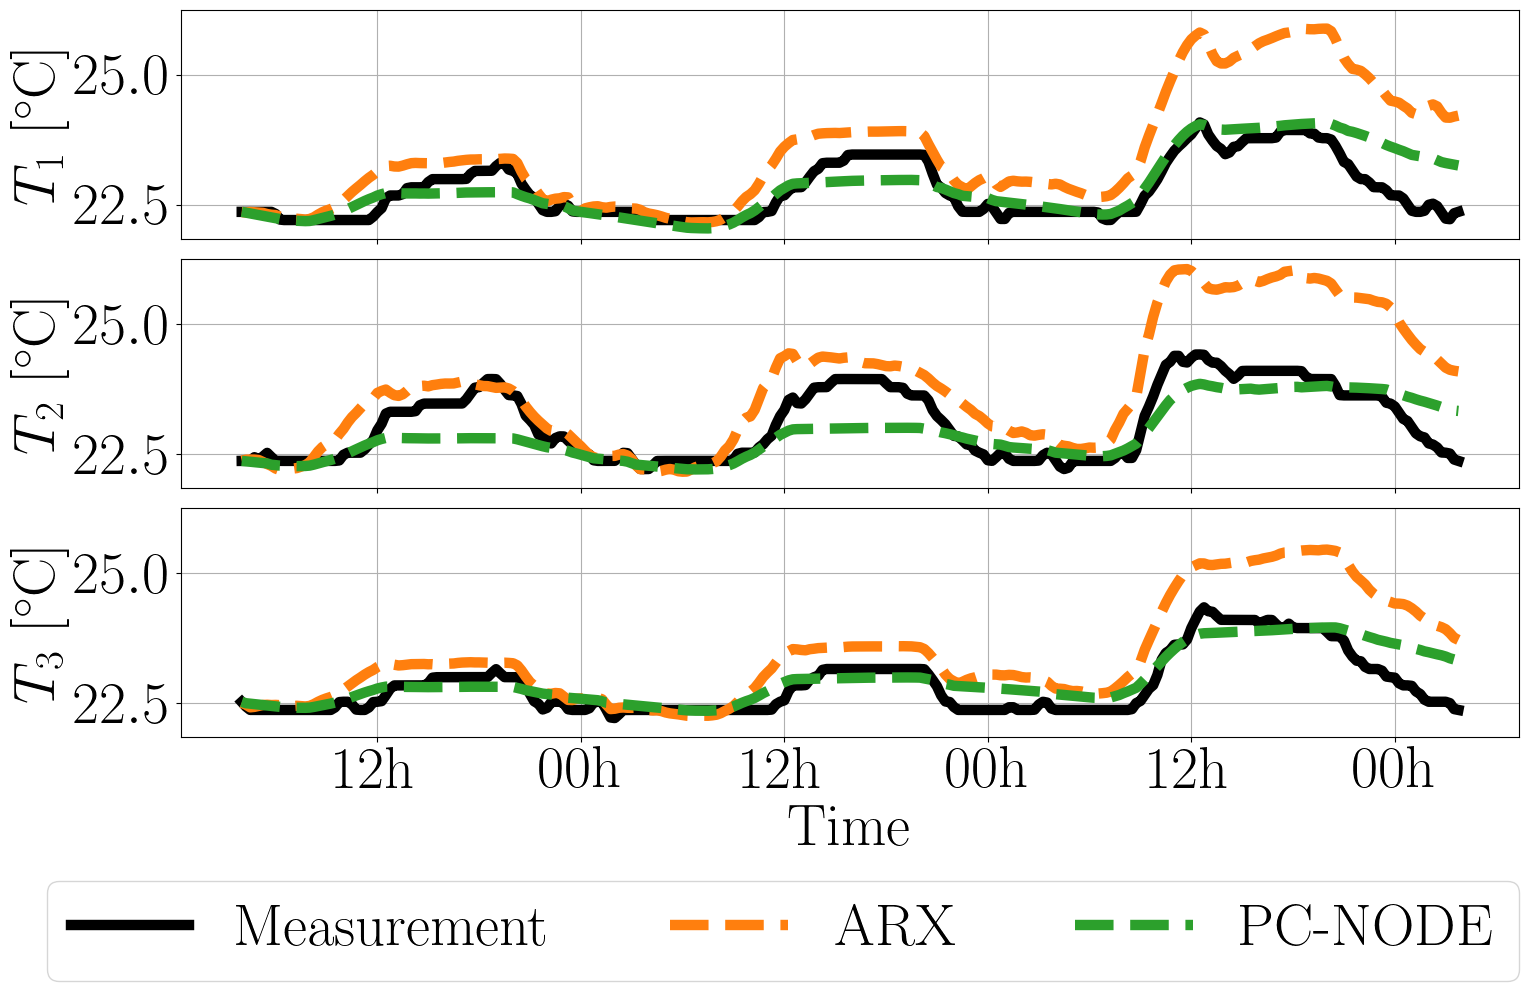

In [5]:
# Set to true to retrain the ARX model used as comparison
retrain_arx = False

# Plot the MAE of both models
arx = get_arx_model(pinode, df, retrain=retrain_arx)
plot_building_errors(pinode, arx, df, scale=2.5, retrain=retrain_arx)

# Plot sample trajectory of PC-NODE
sequence = [x for x in pinode.validation_sequences if x[1] - x[0] >= 300][72]
sequence = (sequence[0]-12, sequence[1] - 36)
plot_building_trajectories(pinode, arx, df, sequence, scale=2.5)

sequence = [x for x in pinode.validation_sequences if x[1] - x[0] >= 300][690]
compare_pcnode_arx_trajectories(pinode, arx, df_=df, sequence=sequence, scale=2.5)